In [74]:
import os
cwd = '/Users/dimitrismarkopoulos/Desktop/BRCA'
os.chdir(cwd)

import joblib

import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

load data

In [66]:
# ---------------------------------
# Load embeddings
# ---------------------------------
embeddings = joblib.load("embeddings_2d.joblib")
print(f'Load embeddings: {list(embeddings.keys())}')

# ---------------------------------
# Import data
# ---------------------------------
data = pd.read_csv('BRCA_data.csv', index_col=0)
X = data.iloc[:,:353].copy()
y = data.iloc[:,353:].copy()

Load embeddings: ['PCA', 'UMAP', 'tSNE', 'Spectral', 'Isomap']


plot embeddings with subtype to validate groupings

In [67]:
X_umap = embeddings['UMAP']

In [68]:
X_umap[:, 0].shape

(445,)

In [69]:
y.values.shape

(445, 6)

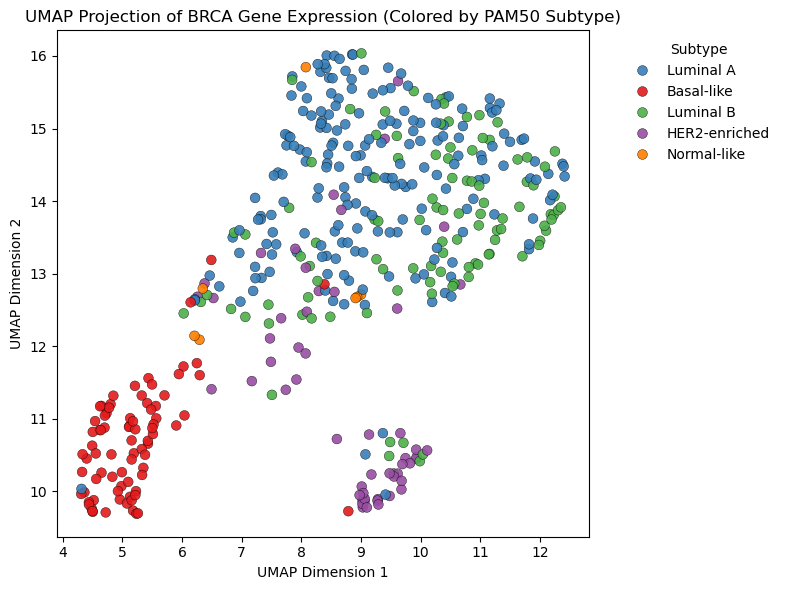

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume X_umap is your 2D numpy array of shape (445, 2)
# and y (or df["Subtype"]) contains the subtype labels for each sample
# e.g. one of ["Basal-like", "Luminal A", "Luminal B", "HER2-enriched", "Normal-like"]

df_umap = pd.DataFrame({
    "UMAP1": X_umap[:, 0],
    "UMAP2": X_umap[:, 1],
    "Subtype": y['Subtype'].values  # ensures same length
})

# Define subtype color palette (PAM50 style)
palette = {
    "Basal-like": "#e41a1c",
    "Luminal A": "#377eb8",
    "Luminal B": "#4daf4a",
    "HER2-enriched": "#984ea3",
    "Normal-like": "#ff7f00"
}


plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_umap,  # must be a DataFrame, not array
    x="UMAP1", y="UMAP2",
    hue="Subtype",
    palette=palette,
    s=50, alpha=0.9, edgecolor="black", linewidth=0.3
)

plt.title("UMAP Projection of BRCA Gene Expression (Colored by PAM50 Subtype)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Subtype", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.tight_layout()
plt.show()


In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Define method names and embeddings_
methods = ["PCA", "UMAP", "t-SNE", "Spectral", "Isomap"]
embeddings_ = [
    embeddings['PCA'], 
    embeddings['UMAP'], 
    embeddings['tSNE'], 
    embeddings['Spectral'],
    embeddings['Isomap']
]

# Define subtype colors (PAM50)
subtype_palette = {
    "Basal-like": "#e41a1c",
    "Luminal A": "#377eb8",
    "Luminal B": "#4daf4a",
    "HER2-enriched": "#984ea3",
    "Normal-like": "#ff7f00"
}

# Convert to dataframe (if not already)
y_series = y['Subtype']

# Create 3×2 grid (bottom-right empty)
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=methods,
    specs=[
        [{}, {}],
        [{}, {}],
        [{}, None]
    ],
    horizontal_spacing=0.08,
    vertical_spacing=0.12
)

# Loop through embeddings_ and add labeled scatter
for i, (name, X_emb) in enumerate(zip(methods, embeddings_)):
    row = i // 2 + 1
    col = i % 2 + 1
    df_plot = pd.DataFrame({
        "x": X_emb[:, 0],
        "y": X_emb[:, 1],
        "Subtype": y_series.values
    })

    for subtype, color in subtype_palette.items():
        df_sub = df_plot[df_plot["Subtype"] == subtype]
        fig.add_trace(
            go.Scatter(
                x=df_sub["x"],
                y=df_sub["y"],
                mode="markers",
                name=subtype if i == 0 else None,  # legend only once
                marker=dict(size=5, color=color, opacity=0.85),
                showlegend=(i == 0)  # only show legend in first subplot
            ),
            row=row, col=col
        )

# Layout & styling
fig.update_layout(
    template="plotly_white",
    height=1200,
    width=1000,
    title_text="Comparison of Unsupervised Methods (2D Projections, Colored by PAM50 Subtype)",
    title_x=0.5,
    font=dict(size=14),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5,
        title="Subtype"
    ),
    margin=dict(l=40, r=40, t=80, b=100)
)

# Export & show
fig.write_html("docs/multi_grid_viz_labels.html", include_plotlyjs="cdn")
fig.show()


Just eyeballing it Basal-like appears to be well distinguished across methods. 

You can really make the assumption that the HER2-enriched is likely a nonlinear pattern because PCA does really poorly at finding this pattern whereas all the nonlinear methods do substantially better.

It seems Luminal A and Luminal B are rather indistinguishable from what I have done so far - needs further work